# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
from datetime import datetime
import typing as tp

from IPython.display import display
from pylab import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge, Lasso, ElasticNet

rcParams["figure.figsize"] = 15, 7

sns.set(palette="Set2", font_scale=1.3)

Импорты из sklearn:

In [3]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import Ridge

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль физика**


В этой задаче мы будем работать с данными по электропотреблению. Данные можете скачать с [сайта](https://miptstats.github.io/courses/ad_mipt.html).

In [4]:
file_path = "data_phys_12.csv" # путь до файла с данными
data = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
data.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Мы будем работать с колонкой `nat_demand`. Проверьте, есть ли в этом столбце пропуски. Если да - удалите эти строки.

In [5]:
data.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

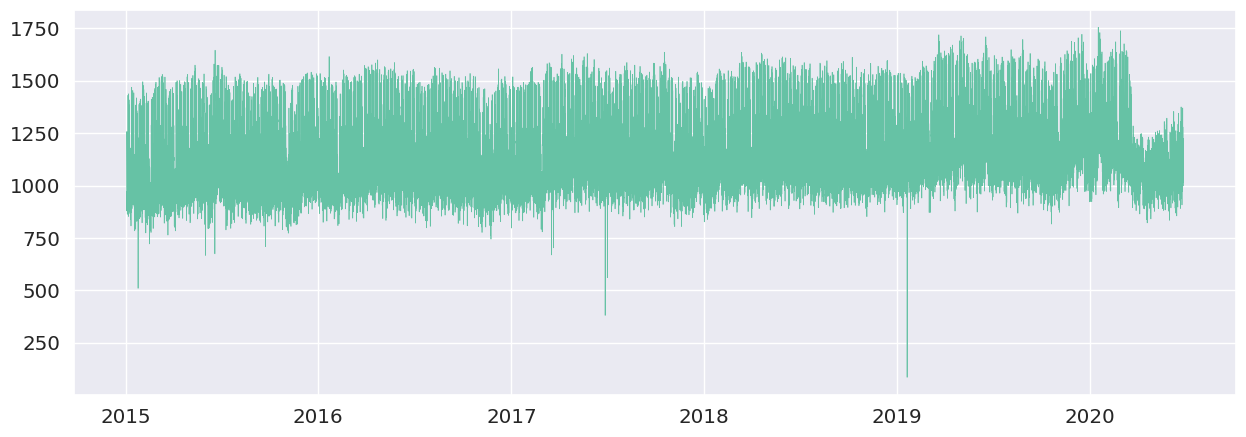

In [6]:
plt.figure(figsize=(15,5))
plt.plot(data['nat_demand'], lw=0.5)

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1). 

In [7]:
# data = pd.read_csv('hrb_sample_1.csv')
# data

Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [8]:
# data = pd.DataFrame(data.values, columns=data.loc[1])
# data = data.drop(0)
# data = data.drop(1)
# data.tail()

Уберем лишние колонки.

In [9]:
# data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [10]:
# data["Time"] = pd.to_datetime(data['Time'])
# data = data.set_index('Time')

Посмотрим, в каком формате хранятся данные о сердцебиении.

In [11]:
# type(data['HR (bpm)'][0])

Переведите значения `HR (bpm)` к целым числам.

In [12]:
# <...>

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

In [13]:
# <...>


### 1. Скользящее среднее

In [14]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''

    return series.rolling(window=n).mean()

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

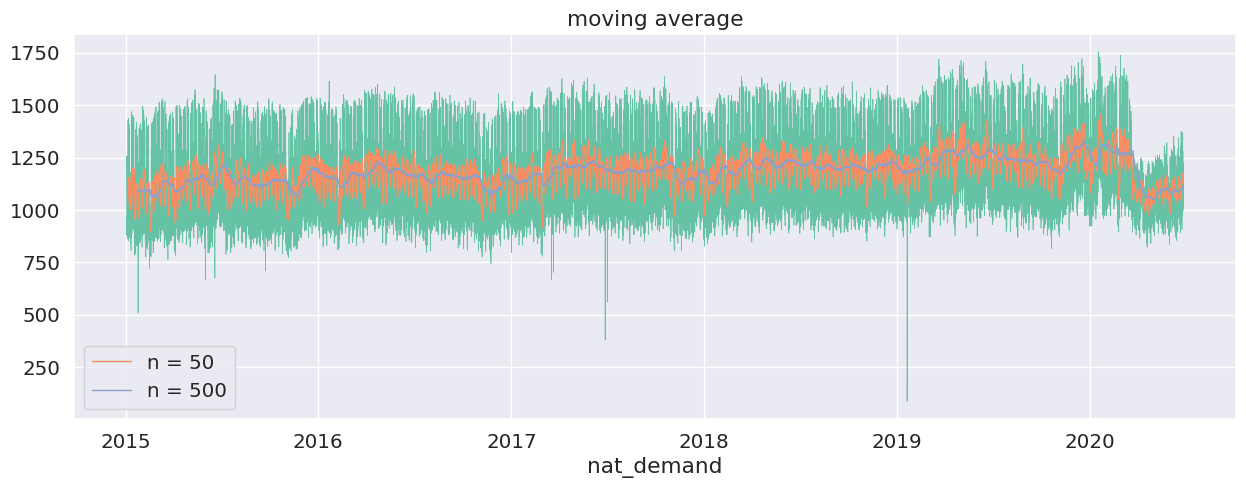

In [15]:
ma_data_1 = moving_average(data['nat_demand'], 50)
ma_data_2 = moving_average(data['nat_demand'], 500)

plt.figure(figsize=(15,5))
plt.plot(data['nat_demand'], lw=0.5)
plt.plot(ma_data_1[50:], lw=1, label="n = 50")
plt.plot(ma_data_2[500:], lw=1, label="n = 500")

plt.xlabel("nat_demand")
plt.title("moving average")

plt.legend()

Чем больше n, тем больше дней мы усредняем и, следовательно, меньше разброс.

### 2. Экспоненциальное сглаживание

In [16]:
def exponential_smoothing(series:pd.Series, alpha:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    '''
        
    result = series.copy()
    for n in range(1, len(series)):
        result[n] = alpha * series[n] + (1 - alpha) * result[n-1]
    return result


Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


/tmp/ipykernel_1297110/2141145797.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result[n] = alpha * series[n] + (1 - alpha) * result[n-1]
/tmp/ipykernel_1297110/2141145797.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  result[n] = alpha * series[n] + (1 - alpha) * result[n-1]


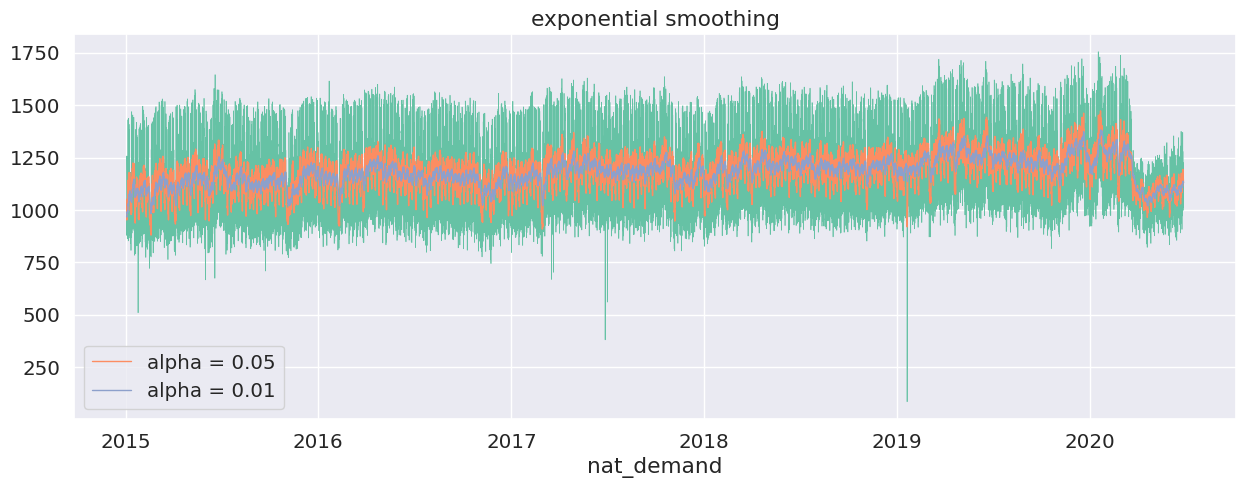

In [17]:
es_data_1 = exponential_smoothing(data['nat_demand'], 0.05)
es_data_2 = exponential_smoothing(data['nat_demand'], 0.01)

plt.figure(figsize=(15,5))
plt.plot(data['nat_demand'], lw=0.5)
plt.plot(es_data_1, lw=1, label="alpha = 0.05")
plt.plot(es_data_2, lw=1, label="alpha = 0.01")

plt.xlabel("nat_demand")
plt.title("exponential smoothing")

plt.legend()

Чем меньше параметр, тем результат ближе к скользящему среднему, чем он больше, тем результат ближе к исходным данным

### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [18]:
def double_exponential_smoothing(series: pd.Series, alpha: float, beta: float) -> pd.Series:
    """
    series: pd.Series - исходные данные
    alpha: float - сглаживающий фактор для уровня ряда
    beta: float - сглаживающий фактор для тренда
    """
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for t in range(1, len(series)):
        value = series[t]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return pd.Series(result, index=series.index)

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

/tmp/ipykernel_1297110/493396660.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [series[0]]
/tmp/ipykernel_1297110/493396660.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level, trend = series[0], series[1] - series[0]
/tmp/ipykernel_1297110/493396660.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = series[t]


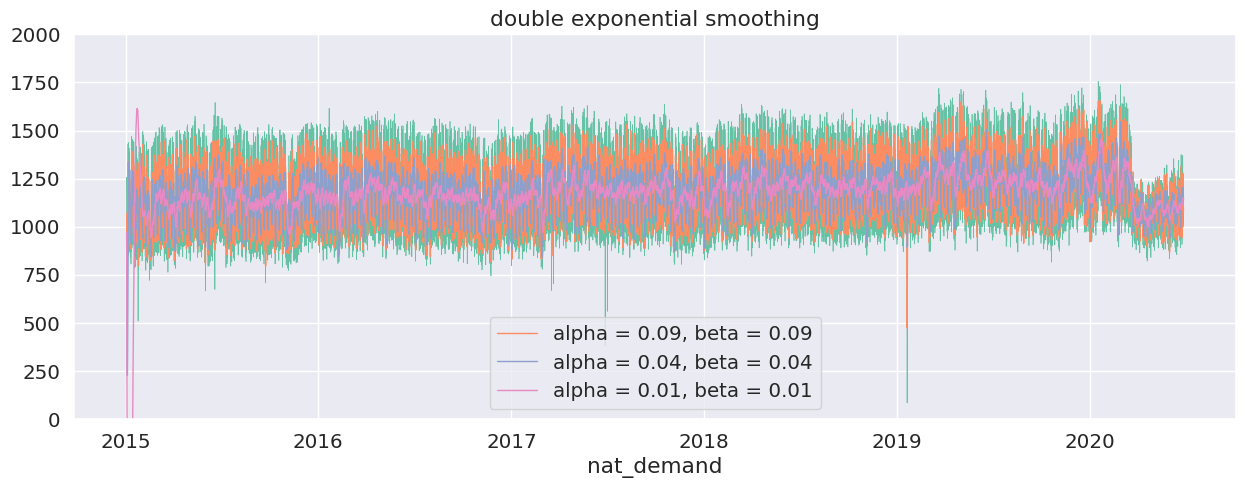

In [19]:
des_data_1 = double_exponential_smoothing(data['nat_demand'], 0.12, 0.12)
des_data_2 = double_exponential_smoothing(data['nat_demand'], 0.04, 0.04)
des_data_3 = double_exponential_smoothing(data['nat_demand'], 0.01, 0.01)

plt.figure(figsize=(15,5))
plt.plot(data['nat_demand'], lw=0.5)
plt.plot(des_data_1, lw=1, label="alpha = 0.09, beta = 0.09")
plt.plot(des_data_2, lw=1, label="alpha = 0.04, beta = 0.04")
plt.plot(des_data_3, lw=1, label="alpha = 0.01, beta = 0.01")

plt.xlabel("nat_demand")
plt.title("double exponential smoothing")

plt.ylim(0, 2000)
plt.legend()

$\alpha$ - это коэффициент сглаживания уровня - при -> 1 функция учитывает новые данные при -> 0 сглаживает краткосрочные колебания, $\beta$ - коэффициент сглаживания тренда - при -> 1 быстро адаптируется под изменение тренда при -> 0 менее отзывчива на смену трендов

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [20]:
data = data["nat_demand"]

test_size = int(len(data)*0.8)
data_train = data.iloc[:test_size]
data_test = data.iloc[test_size:]

In [21]:
data_train.index.weekday

Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='datetime', length=38438)

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [22]:


compare_table = None



In [23]:
def add_results_in_comparison_table(
    method: str, y_true, y_forecast
) -> pd.DataFrame:
    """
    Добавляет новую строчку в таблицу compare_table
    с результатами текущей модели.

    Если ранее модель была уже добавлена в таблицу,
    то старая строчка перезапишется на новую.

    Параметры:
    - method: имя модели.
    - y_true: истинные значения.
    - y_forecast: предсказанные значения.
    """

    # Обращаемся к глобальной переменной
    global compare_table

    # Считаем метрики
    result_row = {
        "method": method,
        "MSE": mean_squared_error(y_true=y_true, y_pred=y_forecast),
        "MAE": mean_absolute_error(y_true=y_true, y_pred=y_forecast),
        "MAPE": mean_absolute_percentage_error(
            y_true=y_true, y_pred=y_forecast
        ),
    }

    # Записываем результат в таблицу
    if compare_table is None:
        compare_table = pd.DataFrame([result_row])
    else:
        if method in list(compare_table["method"]):
            compare_table = compare_table[compare_table["method"] != method]

        compare_table = pd.concat([compare_table, pd.DataFrame([result_row])])
        compare_table.index = np.arange(len(compare_table))
    return compare_table


In [24]:
temp_data = pd.DataFrame(data_train)

# выделяем день недели
temp_data["month"] = data_train.index.month
temp_data["day"] = data_train.index.day
temp_data["hour"] = data_train.index.hour

# считаем среднее за каждый год с учетом дня недели
mean_nat = temp_data.groupby(["month", "day", "hour"])["nat_demand"].mean()
display(mean_nat)

month  day  hour
1      1    0       1000.884575
            1        982.514400
            2        962.471950
            3        948.330725
            4        925.067900
                       ...     
12     31   19      1267.568875
            20      1230.863475
            21      1183.727450
            22      1127.396375
            23      1081.578375
Name: nat_demand, Length: 8784, dtype: float64

In [25]:
simple_prediction = []
for index in data_test.index:
    simple_prediction.append(
        mean_nat.loc[(index.month, index.day, index.hour)]
    )

In [26]:
def plot_results(y_to_train, y_to_test, y_forecast):
    """
    Функция для визуализации временного ряда и предсказания.

    Параметры:
        - y_to_train: pd.Series
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series
            Временной ряд, который предсказывает модель.
        - y_forecast: array
            Предсказания модели.
        - plot_conf_int: bool
            Надо ли строить предсказательного интервал.
        - left_bound: array
            Левая граница предсказательного интервала.
        - right_bound: array
            Правая граница предсказательного интервала.
    """

    plt.figure(figsize=(15, 5))
    plt.title("", fontsize=15)
    plt.plot(y_to_train, label="train")
    plt.plot(y_to_test, label="test")
    plt.plot(y_to_test.index, y_forecast, label="prediction", alpha=0.5)
    plt.legend()
    plt.show()



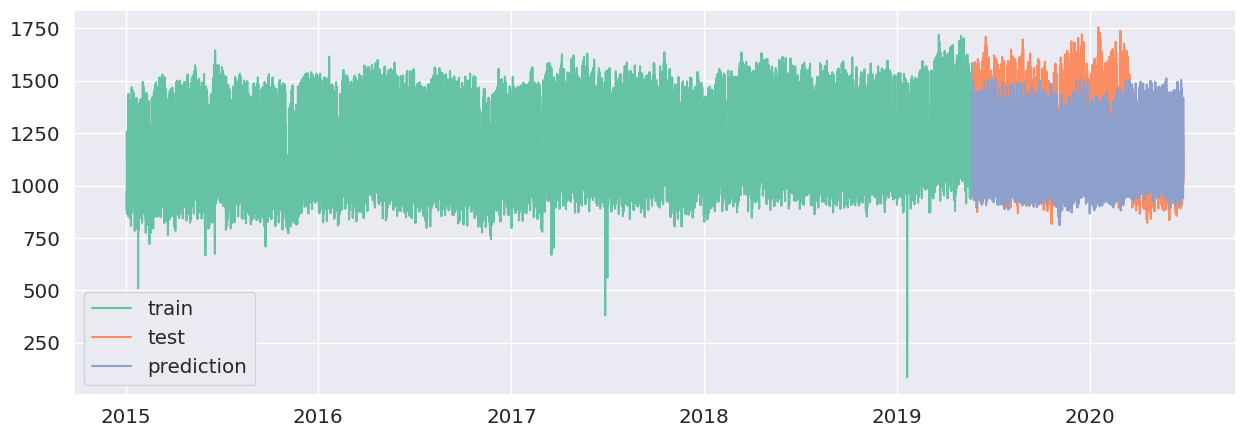

In [27]:
plot_results(data_train, data_test, simple_prediction)

In [28]:


add_results_in_comparison_table(
    "Simple mean model", data_test, simple_prediction
)



,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.10114


**Ответ:**

month: Месяц может влиять на потребление электроэнергии из-за сезонных изменений (например, больше потребления в зимние месяцы из-за отопления).

dayofweek: День недели может влиять на потребление из-за разницы в активности между рабочими и выходными днями.

hour: Час дня напрямую влияет на потребление из-за суточных видов активности.

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. 

In [29]:
def create_date_features(date):
    """Создает фичи из даты"""

    row = {}
    row["dayofweek"] = date.dayofweek
    row["quarter"] = date.quarter
    row["month"] = date.month
    row["year"] = date.year
    row["dayofyear"] = date.dayofyear
    row["dayofmonth"] = date.day
    row["weekofyear"] = date.weekofyear
    return row

In [30]:
def create_only_date_train_features(y_series):
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """

    time_features = pd.DataFrame(
        [create_date_features(date) for date in y_series.index]
    )
    return time_features, y_series

In [31]:


X_train, y_train = create_only_date_train_features(data_train)
X_test, y_test = create_only_date_train_features(data_test)
display(X_train.head())
display(y_train.head())



,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,5,1,1,2015,3,3,1
1,5,1,1,2015,3,3,1
2,5,1,1,2015,3,3,1
3,5,1,1,2015,3,3,1
4,5,1,1,2015,3,3,1


datetime
2015-01-03 01:00:00    970.3450
2015-01-03 02:00:00    912.1755
2015-01-03 03:00:00    900.2688
2015-01-03 04:00:00    889.9538
2015-01-03 05:00:00    893.6865
Name: nat_demand, dtype: float64

In [32]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [33]:
rf = RandomForestRegressor(n_estimators=5, random_state=207, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Визуализируйте полученные прогнозы.

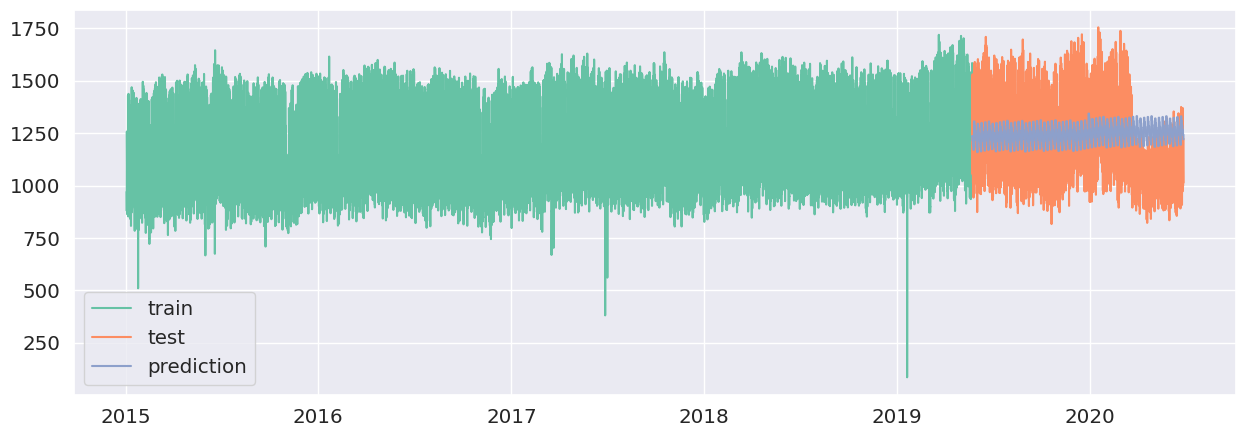

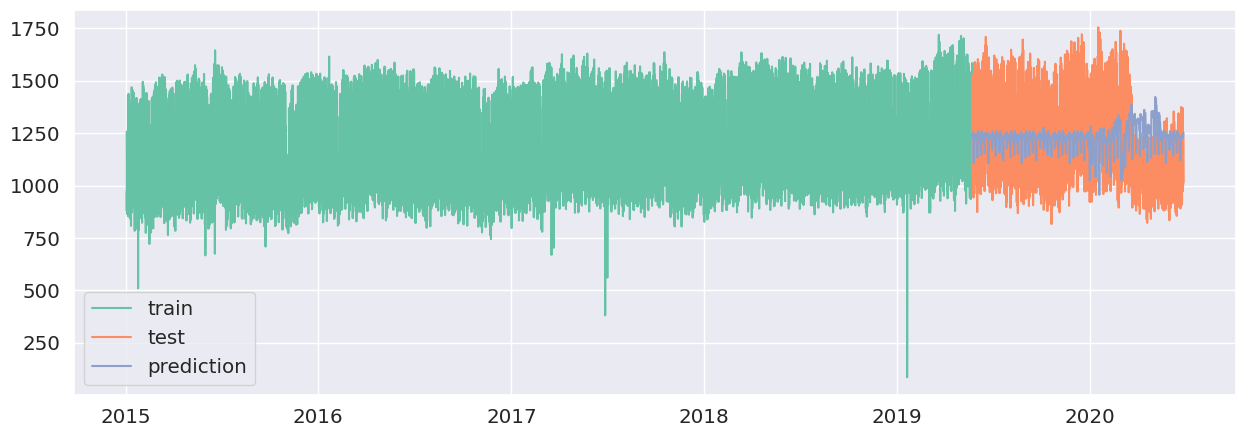

In [34]:


plot_results(data_train, data_test, y_pred_lasso)
plot_results(data_train, data_test, y_pred_rf)



Посчитайте метрики.

In [35]:


add_results_in_comparison_table(
    "Lasso - 1", data_test, y_pred_lasso
)
add_results_in_comparison_table(
    "RandomForest - 1", data_test, y_pred_rf
)

,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.101140
1,Lasso - 1,35602.107093,160.378138,0.137325
2,RandomForest - 1,36936.934730,162.405839,0.136928


### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию. 



In [36]:
def recursive_prediction(
    model, test_dates, y_to_train, features_creation_function
):
    """
    Функция для рекурсивного предсказания для дат,
    указанных в test_dates.

    Параметры:
        - model
            МЛ-модель.
        - test_dates
            массив с датами, в которые надо сделать предсказания.
        - features_creation_function
            функция для создания тестовых признаков
    """
    predictions = []
    previous_y = list(y_to_train)

    for date in test_dates:
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])
        curr_prediction = model.predict(curr_test)[0]
        previous_y.append(curr_prediction)
        predictions.append(curr_prediction)
    return np.array(predictions)

In [37]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [38]:
%%time
lasso_predictions = recursive_prediction(
    lasso,
    data_test.index,
    data_train,
    lambda date, previous_y: create_date_features(date),
)

CPU times: user 6.97 s, sys: 1.03 s, total: 8 s
Wall time: 6.85 s


In [39]:

random_forest = RandomForestRegressor(n_estimators=5, random_state=207, n_jobs=-1)
random_forest.fit(X_train, y_train)



RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=207)

In [40]:

%%time
random_forest_predictions = recursive_prediction(
    random_forest,
    data_test.index,
    data_train,
    lambda date, previous_y: create_date_features(date),
)



CPU times: user 39.5 s, sys: 15.8 s, total: 55.4 s
Wall time: 2min 17s


Визуализируйте полученные прогнозы.

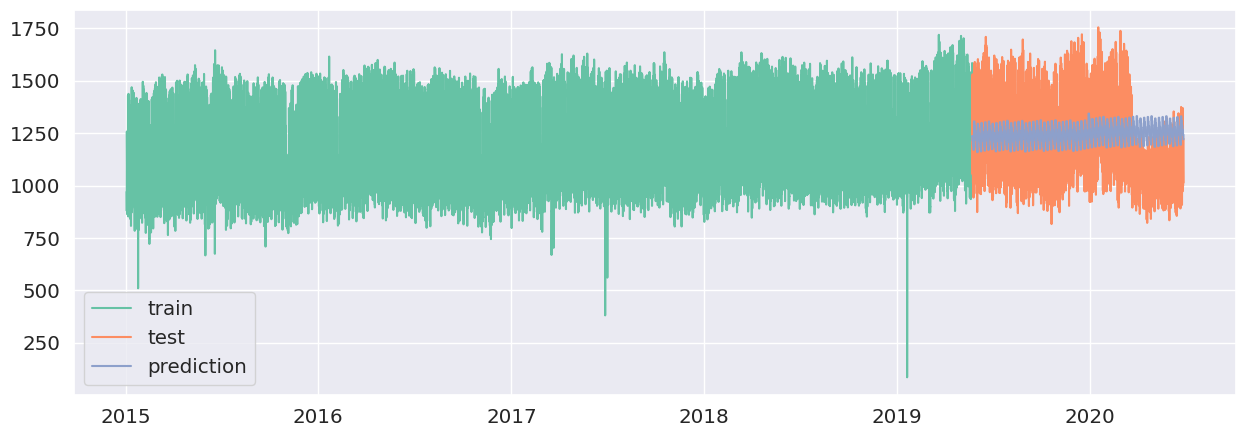

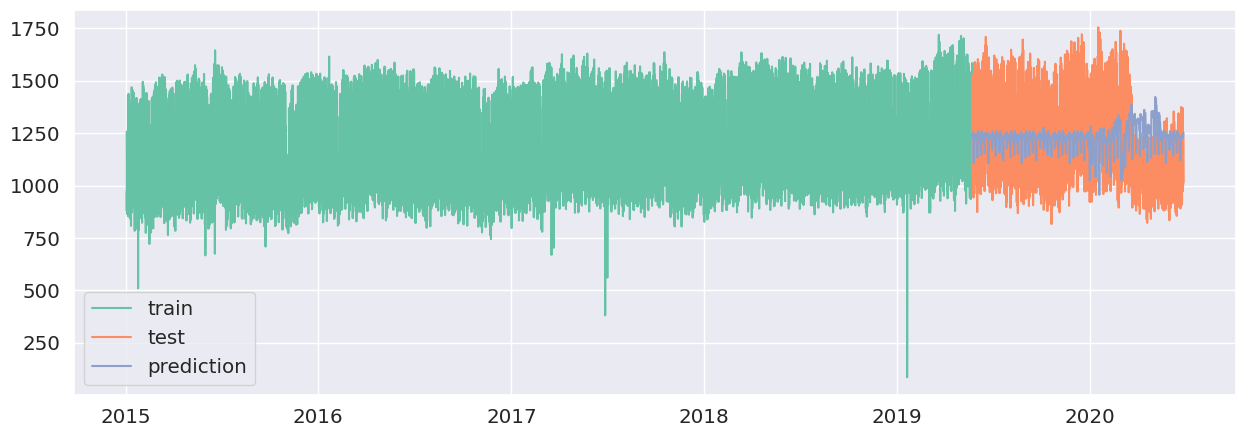

In [41]:
plot_results(data_train, data_test, lasso_predictions)
plot_results(data_train, data_test, random_forest_predictions)

Посчитайте метрики.

In [42]:
add_results_in_comparison_table(
    "Lasso - 2", data_test, lasso_predictions
)
add_results_in_comparison_table(
    "RandomForest - 2", data_test, random_forest_predictions
)

,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.101140
1,Lasso - 1,35602.107093,160.378138,0.137325
2,RandomForest - 1,36936.934730,162.405839,0.136928
3,Lasso - 2,35602.107093,160.378138,0.137325
4,RandomForest - 2,36936.934730,162.405839,0.136928


### 3. Временные сдвиги 

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

In [43]:
def create_date_and_shifted_train_features(
    y_series, shifts=5, week_seasonal_shifts=1, year_seasonal_shifts=1
):
    """
    Создает обучающий датасет из признаков, полученных из дат
    и значений ряда ранее.
    При этом используются значения ряда со сдвигами
    на неделю и год назад.

    Параметры:
        - y_series
            временной ряд.
        - shifts
            дневной сдвиг.
        - week_seasonal_shifts
            недельный сдвиг.
        - year_seasonal_shifts
            годовой сдвиг.
    """

    curr_df, y = create_only_date_train_features(y_series)
    curr_df.index = y_series.index

    # применяем сдвиг по дням
    for shift in range(1, shifts + 1):
        curr_df[f"shift_{shift}"] = y_series.shift(shift, axis=0)

    # применяем сдвиг по неделям
    for shift in range(1, week_seasonal_shifts + 1):
        curr_df[f"week_seasonal_shift_{shift}"] = y_series.shift(
            shift * 7, axis=0
        )

    # применяем сдвиг по годам
    for shift in range(1, year_seasonal_shifts + 1):
        curr_df[f"year_seasonal_shift_{shift}"] = y_series.shift(
            shift * 365, axis=0
        )
    y = y_series

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y

In [44]:
SHIFT = 5  # дневной сдвиг
WEEK_SHIFT = 2  # недельный сдвиг
YEAR_SHIFT = 1  # годовой сдвиг

In [45]:
def date_and_shift_features_generator_for_test(date, previous_y):
    """Функция создания признаков из дат исдвигов ряда для тестовых дат"""

    row = create_date_features(date)
    for shift in range(1, SHIFT + 1):
        row[f"shift_{shift}"] = previous_y[-1 * shift]
    for shift in range(1, WEEK_SHIFT + 1):
        row[f"week_seasonal_shift_{shift}"] = previous_y[-1 * shift * 7]
    for shift in range(1, YEAR_SHIFT + 1):
        row[f"year_seasonal_shift_{shift}"] = previous_y[-1 * shift * 365]
    return row

In [46]:


X_train, y_train = create_date_and_shifted_train_features(
    data_train,
    shifts=SHIFT,
    week_seasonal_shifts=WEEK_SHIFT,
    year_seasonal_shifts=YEAR_SHIFT,
)

X_train.head(5)

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,shift_1,shift_2,shift_3,shift_4,shift_5,week_seasonal_shift_1,week_seasonal_shift_2,year_seasonal_shift_1
datetime,,,,,,,,,,,,,,,
2015-01-18 06:00:00,6,1,1,2015,18,18,3,815.4005,824.3757,831.5366,844.9238,873.3819,928.4173,1056.8685,970.3450
2015-01-18 07:00:00,6,1,1,2015,18,18,3,785.2751,815.4005,824.3757,831.5366,844.9238,891.4272,1053.7863,912.1755
2015-01-18 08:00:00,6,1,1,2015,18,18,3,784.1150,785.2751,815.4005,824.3757,831.5366,873.3819,1046.2940,900.2688
2015-01-18 09:00:00,6,1,1,2015,18,18,3,850.1076,784.1150,785.2751,815.4005,824.3757,844.9238,1063.8643,889.9538
2015-01-18 10:00:00,6,1,1,2015,18,18,3,900.5203,850.1076,784.1150,785.2751,815.4005,831.5366,1054.0308,893.6865


Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [57]:
shifted_lasso = Lasso()
shifted_lasso.fit(X_train, y_train)

Lasso()

In [58]:
%%time
shifted_lasso_pred = recursive_prediction(
    shifted_lasso,
    data_test.index,
    data_train,
    date_and_shift_features_generator_for_test,
)

CPU times: user 10.1 s, sys: 0 ns, total: 10.1 s
Wall time: 10.1 s


In [49]:
shifted_features_random_forest = RandomForestRegressor(
    n_estimators=10, random_state=207, n_jobs=-1
)
shifted_features_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=207)

In [50]:
%%time
shifted_features_random_forest_predictions = recursive_prediction(
    shifted_features_random_forest,
    data_test.index,
    data_train,
    date_and_shift_features_generator_for_test,
)

CPU times: user 49.5 s, sys: 21.9 s, total: 1min 11s
Wall time: 2min 27s


Визуализируйте полученные прогнозы.

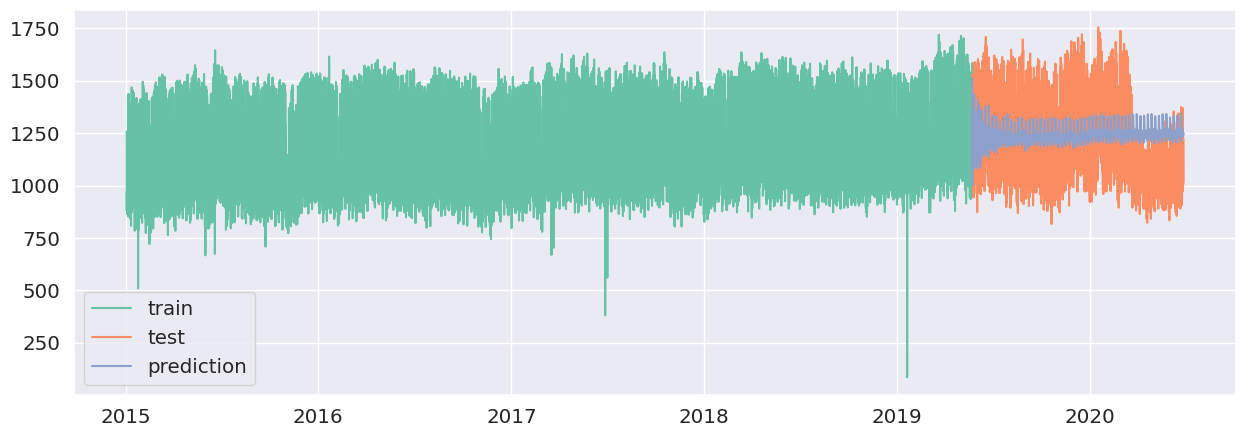

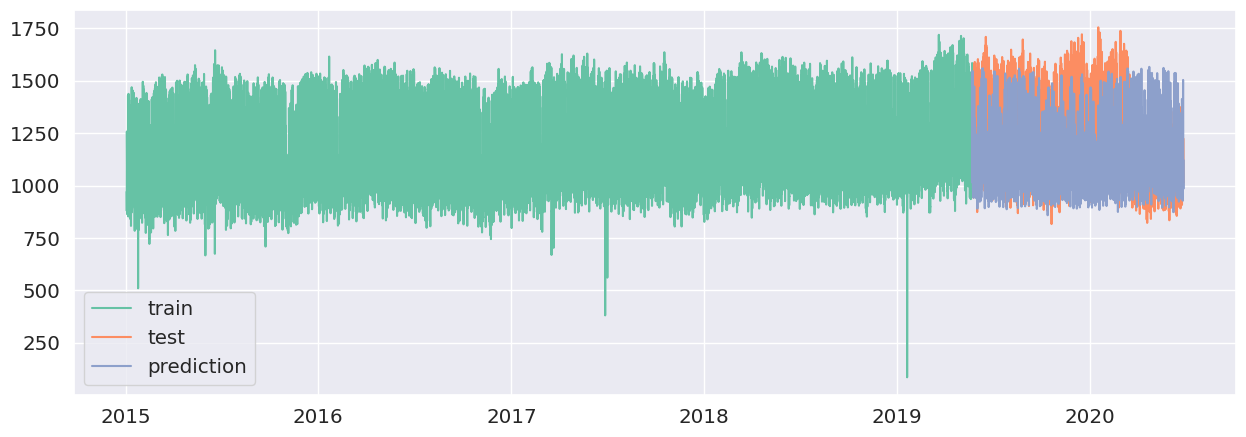

In [59]:
plot_results(
    data_train,
    data_test,
    shifted_lasso_pred,
)

plot_results(
    data_train,
    data_test,
    shifted_features_random_forest_predictions,
)


Посчитайте метрики.

In [60]:


add_results_in_comparison_table(
    "Lasso + shift features",
    data_test,
    shifted_lasso_pred,
)


add_results_in_comparison_table(
    "RandomForest + shift features",
    data_test,
    shifted_features_random_forest_predictions,
)


,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.101140
1,Lasso - 1,35602.107093,160.378138,0.137325
2,RandomForest - 1,36936.934730,162.405839,0.136928
3,Lasso - 2,35602.107093,160.378138,0.137325
4,RandomForest - 2,36936.934730,162.405839,0.136928
5,Lasso + shift features,34801.385617,158.383339,0.134857
6,RandomForest + shift features,60991.782393,195.001118,0.159835


Сделайте выводы по задаче.

**Вывод:**  Среднее за каждый год с учетом времени суток, дня месяца и номера месяца в году показало себя лучше всего. Модели Lasso и Random Forest показывали примерно одинаковые результаты во все экспериментах. Однако модель случайного леса, когда мы сдвигали признаки показала себя наихудшим образом.

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

In [61]:
es_data = exponential_smoothing(data, 0.01)

test_size = int(len(es_data)*0.8)
es_data_train = es_data.iloc[:test_size]
es_data_test = es_data.iloc[test_size:]

/tmp/ipykernel_1297110/2141145797.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result[n] = alpha * series[n] + (1 - alpha) * result[n-1]
/tmp/ipykernel_1297110/2141145797.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  result[n] = alpha * series[n] + (1 - alpha) * result[n-1]


Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [62]:
X_train, y_train = create_only_date_train_features(es_data_train)
X_test, y_test = create_only_date_train_features(es_data_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

rf = RandomForestRegressor(n_estimators=300, random_state=207, n_jobs=-1)
rf.fit(X_train, y_train)
random_forest_predictions = rf.predict(X_test)

Визуализируйте полученные прогнозы.

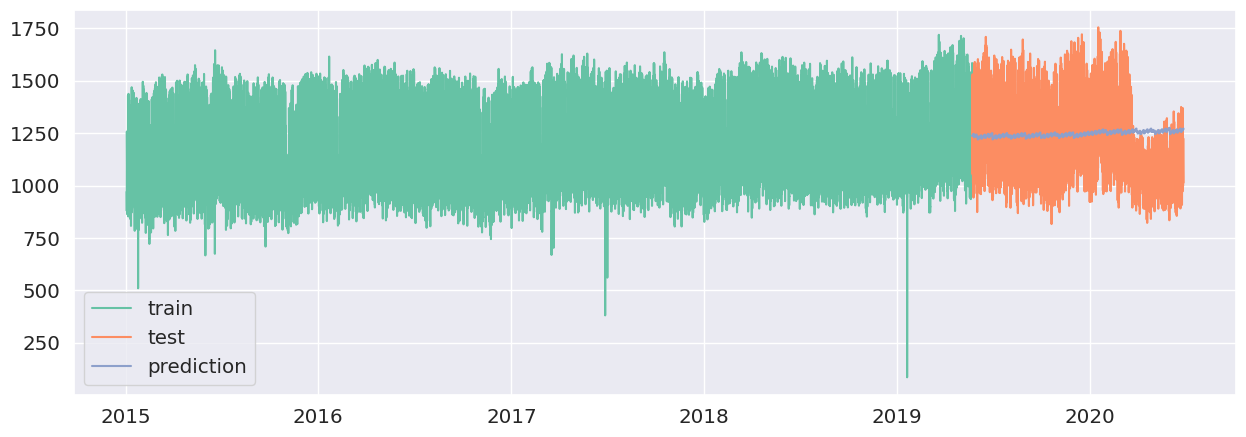

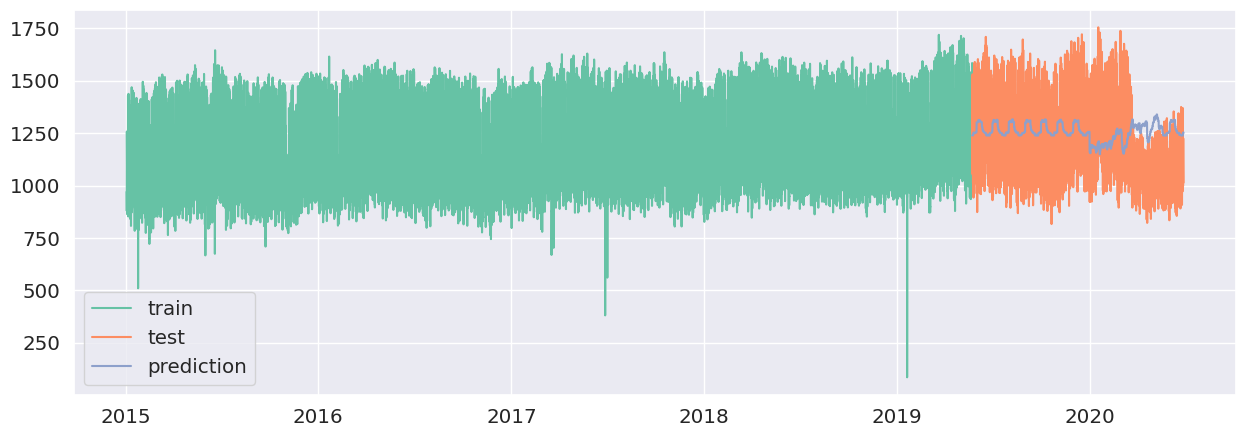

In [66]:
plot_results(data_train, data_test, lasso_predictions)
plot_results(data_train, data_test, random_forest_predictions)

Посчитайте метрики.

In [67]:
add_results_in_comparison_table(
    "Lasso - 3", data_test, lasso_predictions
)
add_results_in_comparison_table(
    "RandomForest - 3", data_test, random_forest_predictions
)

,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.101140
1,Lasso - 1,35602.107093,160.378138,0.137325
2,RandomForest - 1,36936.934730,162.405839,0.136928
3,Lasso - 2,35602.107093,160.378138,0.137325
4,RandomForest - 2,36936.934730,162.405839,0.136928
5,Lasso + shift features,34801.385617,158.383339,0.134857
6,RandomForest + shift features,60991.782393,195.001118,0.159835
7,Lasso - 3,37181.175620,164.398169,0.140612
8,RandomForest - 3,40639.319516,171.652601,0.147676


**Вывод:** я выбрал экспоненциальное сглаживание, так как мне показалось, что для наших данных оно более устойчиво к выбросам. модели Lasso и Случайного леса показали метрики немногим хуже, чем они были в предыдущих пунктах.

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес. 

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [68]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

param_grids = {
    'Ridge': {'alpha': np.arange(1, 100, 1)},
    'Lasso': {'alpha': np.arange(0.1, 10, 0.1)},
    'ElasticNet': {'alpha': np.arange(0.1, 1, 0.1), 'l1_ratio': np.arange(0.1, 0.9, 0.1)}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{name}: MAPE = {mape}")

/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+07, tolerance: 6.717e+03
  model = cd_fast.enet_coordinate_descent(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+06, tolerance: 6.717e+03
  model = cd_fast.enet_coordinate_descent(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Ridge: MAPE = 0.05772606166642536
Lasso: MAPE = 0.05860218233994867
ElasticNet: MAPE = 0.05853170310152816


/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.406e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


In [69]:
best_models.items()

dict_items([('Ridge', Ridge(alpha=31)), ('Lasso', Lasso(alpha=0.1)), ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.8))])

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [70]:
best_model = best_models["Ridge"]

y_train_pred_linear = best_model.predict(X_train)
diff = y_train - y_train_pred_linear

y_test_pred_linear = best_model.predict(X_test)

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [71]:
rf = RandomForestRegressor(n_estimators=300, random_state=207, n_jobs=-1)
rf.fit(X_train, diff)

y_test_error_pred = rf.predict(X_test)



Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [72]:
y_test_corrected = y_test_pred_linear + y_test_error_pred

add_results_in_comparison_table(
    "Boosting", data_test, y_test_corrected
)

,method,MSE,MAE,MAPE
0,Simple mean model,23483.421157,123.534716,0.101140
1,Lasso - 1,35602.107093,160.378138,0.137325
2,RandomForest - 1,36936.934730,162.405839,0.136928
3,Lasso - 2,35602.107093,160.378138,0.137325
4,RandomForest - 2,36936.934730,162.405839,0.136928
5,Lasso + shift features,34801.385617,158.383339,0.134857
6,RandomForest + shift features,60991.782393,195.001118,0.159835
7,Lasso - 3,37181.175620,164.398169,0.140612
8,RandomForest - 3,40639.319516,171.652601,0.147676
9,Boosting,40039.684370,170.979045,0.146391


Визуализируйте новый прогноз.

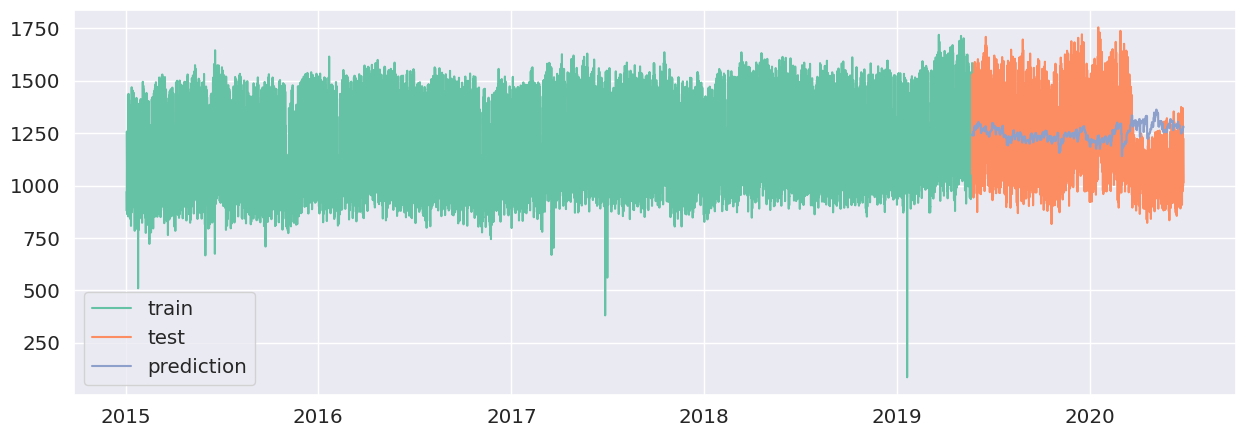

In [73]:
plot_results(data_train, data_test, y_test_corrected)

Сделайте вывод.

**Вывод:** Модель случайного леса показала себя немного лучше, чем в предыдущем пункте, но она все еще остается хуже моделей с задач 1 и 2

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.